In [85]:
import pandas as pd
import numpy as np
import json
import pickle
import pathlib
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
import inflect
# import contractions
# from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
# from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk import ngrams

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [86]:
with open("Stats_intent.json", encoding="utf8") as f:
    statsJson = json.loads(f.read())
# with open("stop_words.json", encoding="utf8") as f:
#     stop_words = json.loads(f.read())

In [87]:
intentList = []
patternList = []
for intent in statsJson["intents"]:
    for pattern in intent["patterns"]:
        intentList.append(intent['tag'])
        patternList.append(pattern)

In [88]:
data = {'Pattern': patternList, 'Intent': intentList}
df = pd.DataFrame(data, columns = ['Pattern', 'Intent'])
df

Pattern                 Intent
0           What is the <ATTR> of <OBJ> on <TEMPORAL>                  Stats
1   What is the <ATTR> of <OBJ> from <TEMPORAL> to...                  Stats
2                                     <ATTR> of <OBJ>                  Stats
3                                        <OBJ> <ATTR>                  Stats
4                                         <OBJ> stats                  Stats
5                                    <OBJ> statistics                  Stats
6                        Show <ATTR> running on <OBJ>                  Stats
7                             <OBJ> <ATTR> <TEMPORAL>                  Stats
8                            What is <ATTR> for <OBJ>                  Stats
9                       What is <ATTR> for <TEMPORAL>                  Stats
10         What is the <ATTR> of <OBJ> that run <OBJ>                  Stats
11  What is the <DIRECTION> <ATTR> between <OBJ> a...          Stats Compare
12  What is the <DIRECTION> in <ATTR> for <OBJ> ov...          Stats Compare
13          How much did <ATTR> <DIRECTION> for <OBJ>          Stats Compare
14               <OBJ> <DIRECTION> <ATTR> by how much          Stats Compare
15  <ATTR> <DIRECTION> by how much for  <OBJ> from...          Stats Compare
16               <ATTR> <OBJ> <DIRECTION> by how much          Stats Compare
17  <ATTR> <OBJ> change from <TEMPORAL> to <TEMPORAL>          Stats Compare
18                <ATTR> <OBJ> <DIRECTION> <TEMPORAL>          Stats Compare
19                <DIRECTION> <ATTR> <OBJ> <TEMPORAL>          Stats Compare
20            what is the <DIRECTION> in <ATTR> <OBJ>          Stats Compare
21           What is the <ATTR> <DIRECTION> for <OBJ>          Stats Compare
22  How much did <OBJ> <ATTR> <DIRECTION> on <TEMP...          Stats Compare
23                  how much <OBJ> <ATTR> <DIRECTION>          Stats Compare
24  what is the <DESC> <DIRECTION> of <OBJ> <ATTR>...  Stats Specific Change
25                  <DESC> <ATTR> <OBJ> on <TEMPORAL>  Stats Specific Change
26                    <DESC> <DIRECTION> <ATTR> <OBJ>  Stats Specific Change
27         <OBJ> <ATTR> <DESC> <DIRECTION> <TEMPORAL>  Stats Specific Change
28  how much is the <DESC> <DIRECTION> for <OBJ> <...  Stats Specific Change
29                                  <OBJ> information      Basic Information
30                                         <OBJ> info      Basic Information
31          What are the materials used in this <OBJ>      Basic Information
32                                   <OBJ> properties      Basic Information
33                                              <OBJ>      Basic Information
34                                             <ATTR>      Basic Information
35                                 What does <OBJ> do      Basic Information

In [89]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize_text(words):
    # words = remove_non_ascii(words)
    words = to_lowercase(words)
    # words = remove_punctuation(words)
    # words = replace_numbers(words)
    # words = remove_stopwords(words)
    # words = stem_words(words)
    # words = lemmetize_verbs(words)
    return words
def remove_stopwords(text):
    word_list = text.split()
    text = ' '.join([x for x in word_list if x not in stop_words])
    return text

def pad(text):
    word_list = text.split()
    word_list.insert(0, "<start>")
    word_list.insert(len(word_list), "<end>")
    text = ' '.join([x for x in word_list if x not in stop_words])
    return text

def tokenize(text):
    return nltk.word_tokenize(text)

def text_prepare(text):
    # text = ' '.join([x for x in normalize_text(tokenize(text))])
    
    return re.sub(r'[^\w]', ' ', text).lower()

In [90]:
df['Cleaned Pattern'] = [text_prepare(x) for x in df['Pattern']]
le = LabelEncoder()
df['label'] = le.fit_transform(df['Intent'])
df

Pattern                 Intent  \
0           What is the <ATTR> of <OBJ> on <TEMPORAL>                  Stats   
1   What is the <ATTR> of <OBJ> from <TEMPORAL> to...                  Stats   
2                                     <ATTR> of <OBJ>                  Stats   
3                                        <OBJ> <ATTR>                  Stats   
4                                         <OBJ> stats                  Stats   
5                                    <OBJ> statistics                  Stats   
6                        Show <ATTR> running on <OBJ>                  Stats   
7                             <OBJ> <ATTR> <TEMPORAL>                  Stats   
8                            What is <ATTR> for <OBJ>                  Stats   
9                       What is <ATTR> for <TEMPORAL>                  Stats   
10         What is the <ATTR> of <OBJ> that run <OBJ>                  Stats   
11  What is the <DIRECTION> <ATTR> between <OBJ> a...          Stats Compare   
12  What is the <DIRECTION> in <ATTR> for <OBJ> ov...          Stats Compare   
13          How much did <ATTR> <DIRECTION> for <OBJ>          Stats Compare   
14               <OBJ> <DIRECTION> <ATTR> by how much          Stats Compare   
15  <ATTR> <DIRECTION> by how much for  <OBJ> from...          Stats Compare   
16               <ATTR> <OBJ> <DIRECTION> by how much          Stats Compare   
17  <ATTR> <OBJ> change from <TEMPORAL> to <TEMPORAL>          Stats Compare   
18                <ATTR> <OBJ> <DIRECTION> <TEMPORAL>          Stats Compare   
19                <DIRECTION> <ATTR> <OBJ> <TEMPORAL>          Stats Compare   
20            what is the <DIRECTION> in <ATTR> <OBJ>          Stats Compare   
21           What is the <ATTR> <DIRECTION> for <OBJ>          Stats Compare   
22  How much did <OBJ> <ATTR> <DIRECTION> on <TEMP...          Stats Compare   
23                  how much <OBJ> <ATTR> <DIRECTION>          Stats Compare   
24  what is the <DESC> <DIRECTION> of <OBJ> <ATTR>...  Stats Specific Change   
25                  <DESC> <ATTR> <OBJ> on <TEMPORAL>  Stats Specific Change   
26                    <DESC> <DIRECTION> <ATTR> <OBJ>  Stats Specific Change   
27         <OBJ> <ATTR> <DESC> <DIRECTION> <TEMPORAL>  Stats Specific Change   
28  how much is the <DESC> <DIRECTION> for <OBJ> <...  Stats Specific Change   
29                                  <OBJ> information      Basic Information   
30                                         <OBJ> info      Basic Information   
31          What are the materials used in this <OBJ>      Basic Information   
32                                   <OBJ> properties      Basic Information   
33                                              <OBJ>      Basic Information   
34                                             <ATTR>      Basic Information   
35                                 What does <OBJ> do      Basic Information   

                                      Cleaned Pattern  label  
0           what is the  attr  of  obj  on  temporal       1  
1   what is the  attr  of  obj  from  temporal  to...      1  
2                                      attr  of  obj       1  
3                                         obj   attr       1  
4                                          obj  stats      1  
5                                     obj  statistics      1  
6                        show  attr  running on  obj       1  
7                              obj   attr   temporal       1  
8                            what is  attr  for  obj       1  
9                       what is  attr  for  temporal       1  
10         what is the  attr  of  obj  that run  obj       1  
11  what is the  direction   attr  between  obj  a...      2  
12  what is the  direction  in  attr  for  obj  ov...      2  
13          how much did  attr   direction  for  obj       2  
14                obj   direction   attr  by how much      2  
15   attr   direction  by how much for   obj  from...      2  
16            

# One gram

In [91]:
# Get vocab list

wordfreq = {}
for index in df.index:
    tokens = nltk.word_tokenize(df['Cleaned Pattern'][index])
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

print(len(wordfreq.keys())) # 59 unique unigrams
# for w in wordfreq.keys():
#     print(w, wordfreq[w])

37


In [92]:
# BoW for each training sample

query_vectors = []
for index in df.index:
    query_tokens = nltk.word_tokenize(df['Cleaned Pattern'][index])
    query_vec = []
    for token in wordfreq:
        if token in query_tokens:
            query_vec.append(1)
        else:
            query_vec.append(0)
    query_vectors.append(query_vec)

one_gram_vocab = [x for x in wordfreq.keys()]
# one_gram_vocab
# for q in query_vectors:
#     print(q)

# for q in query_vectors:
#     print(q)

In [93]:
pickle.dump(one_gram_vocab, open('stats_unigrams.pkl', 'wb'))

In [94]:
n = 0

onegram = pd.DataFrame()
for t in wordfreq.keys():
    words = []
    for q in query_vectors:
        words.append(q[n])
    n = n+1
    onegram[t] = words
# onegram

In [95]:
# append label with BoW
pd.set_option('display.max_rows', None)
onegram['label'] = [x for x in df['label']]
# onegram

In [96]:
# split one gram to feature and label

X_1 = onegram.iloc[:, 0:-1]
y_1 = onegram.iloc[:, -1:]

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[0.01377027 0.03917883 0.02855329 0.09111611 0.04301439 0.04165944
 0.01670675 0.03175828 0.01250411 0.01461299 0.042179   0.04323017
 0.00541935 0.00577261 0.01326475 0.00245446 0.00222735 0.2142947
 0.00344395 0.00161737 0.01073296 0.00297865 0.02930063 0.02788125
 0.00603798 0.01635233 0.01614721 0.18274117 0.00707701 0.00752831
 0.00312137 0.00261933 0.00341844 0.00205132 0.00714661 0.00489517
 0.00319206]
1.0


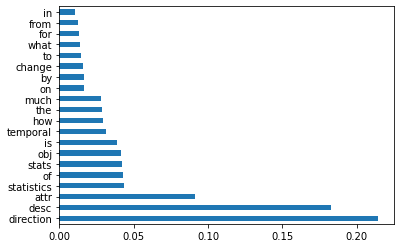

In [98]:
model = ExtraTreesClassifier()
model.fit(X_1,y_1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
print(model.score(X_1, y_1))
feat_importances = pd.Series(model.feature_importances_, index=X_1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [45]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1)

In [46]:
model1 = ExtraTreesClassifier()
model1.fit(x1_train, y1_train)
model1.score(x1_test, y1_test)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8888888888888888

In [47]:
with open('stats_model1gram.pkl','wb') as f:
    pickle.dump(model1,f)

# 2 grams

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_two_vect = CountVectorizer(ngram_range=(2,2))
# count_onetwo_vect = CountVectorizer(ngram_range=(1,2))
X_train_two_counts = count_two_vect.fit_transform(df['Cleaned Pattern'])
two_gram_vocab = count_two_vect.get_feature_names()
# two_gram_vocab


In [49]:
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [50]:
# Bow 2grams 

query_2_vectors = []
for index in df.index:
    n = 2
    twograms = get_ngrams(df['Cleaned Pattern'][index], n)
    # print(twograms)
    # for x in twograms:
    #     print(x)
    query_2_vec = []
    for t in two_gram_vocab:
        if t in twograms:
            query_2_vec.append(1)
        else:
            query_2_vec.append(0)
    query_2_vectors.append(query_2_vec)

In [51]:
pickle.dump(two_gram_vocab, open('stats_bigrams.pkl', 'wb'))

In [52]:
n = 0

twogram = pd.DataFrame()
for t in two_gram_vocab:
    words = []
    for q in query_2_vectors:
        words.append(q[n])
    n = n+1
    twogram[t] = words

# twogram

In [53]:
twogram['label'] = [x for x in df['label']]
# twogram

In [54]:
X_2 = twogram.iloc[:, 0:-1]
y_2 = twogram.iloc[:, -1:]

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[2.27854829e-03 1.24209196e-03 4.02737759e-03 2.81810912e-03
 6.28674577e-03 6.00173822e-02 1.38081775e-02 6.53029407e-02
 3.87224389e-02 3.60950689e-03 6.13072550e-03 1.07471466e-02
 1.37090581e-03 1.41229195e-02 4.74084790e-03 1.67521094e-02
 1.01365356e-01 1.83936235e-05 1.26803556e-03 2.83172667e-02
 3.35113719e-03 1.20168393e-02 1.05753228e-02 5.00937714e-03
 8.53464132e-04 1.82728655e-02 3.21587116e-03 1.66029693e-02
 2.45053766e-03 6.47881971e-03 5.47940373e-02 1.07911741e-02
 1.43410418e-03 2.20674702e-02 1.81231955e-02 2.23920239e-03
 7.74982409e-03 5.15021459e-04 3.50521153e-03 3.30514053e-03
 3.18170071e-03 5.75503918e-02 4.05214524e-03 2.57418334e-02
 3.31098150e-03 1.37659551e-03 6.67368189e-03 7.31899401e-03
 1.02242173e-02 1.91940499e-03 6.37344737e-03 4.40371580e-02
 4.10052839e-02 1.43640495e-02

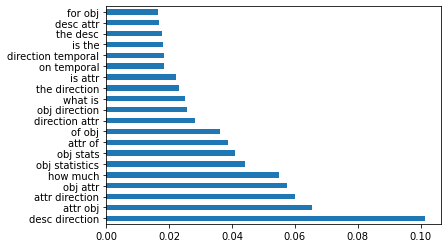

In [55]:
model2 = ExtraTreesClassifier()
model2.fit(X_2,y_2)
print(model2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model2.feature_importances_, index=X_2.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [81]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X_2, y_2)

In [82]:
model2 = ExtraTreesClassifier()
model2.fit(x2_train, y2_train)
model2.score(x2_test, y2_test)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8888888888888888

In [83]:
with open('stats_model2gram.pkl','wb') as f:
    pickle.dump(model2,f)


In [59]:
# model2.score(x2_test, y2_test)

# 1-2 grams

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

count_onetwo_vect = CountVectorizer(ngram_range=(1,2))
# count_onetwo_vect = CountVectorizer(ngram_range=(1,2))
X_train_onetwo_counts = count_onetwo_vect.fit_transform(df['Cleaned Pattern'])
onetwo_gram_vocab = count_onetwo_vect.get_feature_names()
# onetwo_gram_vocab

In [61]:
onetwogram = pd.DataFrame()

In [62]:
onecol = X_1.columns
for o in onecol:
    onetwogram[o] = X_1[o].values

In [63]:
twocol = X_2.columns
for o in twocol:
    onetwogram[o] = X_2[o].values

In [64]:
# onetwogram

[6.84121458e-03 1.38563568e-02 9.33393012e-03 6.90994107e-02
 2.87855836e-02 1.72324348e-02 5.26978423e-03 2.83590650e-02
 4.41383522e-03 3.93054112e-03 1.92017167e-02 1.99130741e-02
 2.41432816e-03 4.27792379e-03 6.15839016e-03 5.15021459e-04
 5.79399142e-04 1.13519289e-01 1.11117661e-03 8.33501641e-04
 2.71375534e-03 0.00000000e+00 1.74548752e-02 2.40320384e-02
 1.31888580e-03 8.17895029e-03 2.64497602e-03 8.08729454e-02
 3.01344149e-03 3.13728332e-03 1.12868056e-03 1.57703391e-03
 1.56076043e-03 1.92691895e-03 2.63020456e-03 1.87735226e-03
 1.14408338e-03 1.24646222e-03 6.44389945e-04 0.00000000e+00
 8.48649331e-04 6.85941737e-03 1.95548461e-02 9.38128850e-03
 4.02716415e-02 2.35192734e-02 3.02486323e-03 3.68760210e-03
 7.62364320e-03 2.11190356e-03 4.74004772e-03 6.18408005e-03
 4.50878454e-03 4.74857849e-02 1.98651134e-04 3.67079020e-04
 1.05652223e-02 6.62657338e-04 4.37639387e-03 8.25671980e-03
 4.44465406e-03 3.65042683e-04 3.85899792e-03 2.04736741e-03
 6.70558087e-03 1.644612

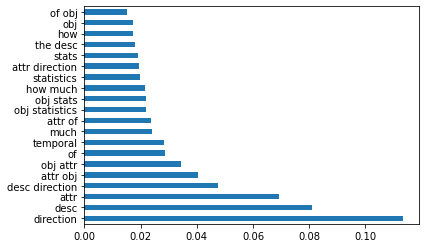

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(onetwogram, y_2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=onetwogram.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [66]:
x12_train, x12_test, y12_train, y12_test = train_test_split(onetwogram.iloc[:,:-1], onetwogram.iloc[:,-1:])

In [67]:
model12 = ExtraTreesClassifier()
model12.fit(x12_train, y12_train)
model12.score(x12_test, y12_test)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8888888888888888

In [68]:
with open('stats_model12gram.pkl','wb') as f:
    pickle.dump(model2,f)